<a href="https://colab.research.google.com/github/GiovannaRochaDSM/FATEC_MINERACAO_DADOS_2SEM2024/blob/master/Giovanna_da_Rocha_Machado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ATIVIDADE P1**

## **Análise Exploratória de Dados**

#### *Giovanna da Rocha Machado - RA: 1131392213024*

Links deste exercício:
- https://www.kaggle.com/datasets/zynicide/wine-reviews
- https://seaborn.pydata.org/
- https://www.wine-searcher.com/critics-17-wine+enthusiast

Fomos contratados por uma grande empresa distribuidora de vinhos. Nosso cliente deseja melhorar as vendas entregando produtos que agradem os diversos perfis de clientes. O foco do nosso projeto aqui é desenvolver uma análise exploratória nos [dados de avaliações de vinhos](https://www.kaggle.com/datasets/zynicide/wine-reviews).

Uma análise exploratória bem elaborada consiste em algumas etapas:

- Compreensão do negócio
- Compreensão dos dados
- Preparar os dados (limpeza e tratamento)
- Análise de dados (extrair informações relevantes e responder perguntas)
- Avaliação dos resultados

Nosso objetivo ao concluir esse projeto é responder as seguintes perguntas:

1. De onde vem o melhor vinho ?
2. O preço do vinho está relacionado com a qualidade ?
3. Certas variedades de uvas são de maior qualidade ?
4. Qual é o melhor vinho em cada faixa de preço ?
5. Que palavras são mais utilizadas para descrever um vinho ?
6. A descrição do vinho influencia a avaliação dos especialistas?
7. Quais são os estilos de vinho que apresentam a maior variação nas avaliações dos especialistas?
8. Quais são as combinações mais comuns de país, variedade e preço que resultam em alta qualidade?

Vamos começar!

# Verificação de Dados



Vamos verificar os dados que usaremos para responder as perguntas acima. Para isso, vamos começar com a importação de bibliotecas!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

A biblioteca de visualização Seaborn é baseada na biblioteca Matplotlib que permite plotar os gráficos de forma mais simples, ou seja, menos códigos.

In [2]:
df = pd.read_csv("/content/winemag-data-130k-v2.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


**Nomes das colunas**

In [3]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

Vamos explicar cada uma dessas colunas para simplificar nossa análise.



*  **unnamed** - parece uma coluna de indíce (podemos remover)
*   **country** - país onde o vinho foi feito (bom dado)
*   **description** - descrição do vinho
*   **designation** - vinhedo dentro da adega de onde as uvas que fizeram o vinho foram coletadas.
*   **points** - nº de pontos que o vinho obteve em sua avaliação - escala de pontos Wine Searcher
*   **price** - preço da garrafa
*   **province** - província/estado onde vinho foi feito
*   **region_1** - região onde foi feito
*   **region_2** - região mais específica dentro de uma vitícola (podemos remover)
*   **taster_name** - nome do revisor do vinho
*   **taster_twitter_handle** - perfil do Twitter do revisor
*   **title** - nome do vinho (inclui ano de fabricação)
*   **variety** - tipo de uva usada na fabricação
*   **winery** - adega onde o vinho foi feito

**Tipos de dados**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


Temos 129.971 linhas pertencentes a 14 colunas do nosso dataset. Exitem dados ausentes e podemos descartar algumas colunas, como dito anteriormente.

Faremos uma pré-análise estatística dos valores numéricos do nosso df com describe()

In [5]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


A função describe() mostra a distribuição de pontos para uma garrafa de vinho, onde o **mínimo é 80** e o **máximo é 100**. Podemos analisar que a garrafa mais barata custa `$ 4`, e a mais cara `$ 3.300`. Podemos analisar a classificação por pontos conforme a [escala de pontos da Wine Searcher.](https://www.wine-searcher.com/critics-17-wine+enthusiast)

**98-100** - Clássico

**94-97** - Soberbo

**90-93** - Excelente

**87-89** - Muito bom

**83-86** - Bom

**80-82** - Aceitável

Vamos contar quantos vinhos foram avaliados por cada país com a função value_counts():

In [6]:
df["country"].value_counts()

,count
country,
US,54504
France,22093
Italy,19540
Spain,6645
Portugal,5691
Chile,4472
Argentina,3800
Austria,3345
Australia,2329


Os países que mais avaliaram vinhos foram **EUA, França, Itália, Espanha e Portugal.**
Vamos utilizar o value_counts() para ver quais tipos de uva foram utilizadas para fabricar os vinhos avaliados.

In [7]:
df["variety"].value_counts()

,count
variety,
Pinot Noir,13272
Chardonnay,11753
Cabernet Sauvignon,9472
Red Blend,8946
Bordeaux-style Red Blend,6915
...,...
Cabernet Sauvignon-Barbera,1
Sauvignonasse,1
Forcallà,1


Podemos limpar os dados, pois vimos que as colunas **unamed, designation, region_1, region_2, taster_name e taster_twitter_handle** não são úteis para nossa análise.

# Limpeza de Dados

Podemos fazer uma cópia do nosso dataframe utilizando a função `copy() `para não perder o original e remover colunas não utilizadas.

In [8]:
df1 = df.copy()

Vamos remover as colunas que não utilizaremos na análise com o `drop()`:

In [9]:
df1 = df1.drop(["Unnamed: 0", "designation","region_1", "region_2","taster_name","taster_twitter_handle"], axis=1)
df1.head()

,country,description,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Precisamos ainda remover dados ausentes:

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   title        129971 non-null  object 
 6   variety      129970 non-null  object 
 7   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.9+ MB


Vamos fazer cálculos de proporção na coluna de preço (muito útil na análise) e verificarmos que apresenta dados ausentes:

In [11]:
df1.shape

(129971, 8)

In [12]:
print("{:.0%}".format(df1["price"].count() / df1.shape[0]))

93%


Como percebemos, existem valores nulos em algumas colunas, podemos remover estas linhas com o `dropna`.

In [13]:
df1 = df1. dropna(subset=["country", "price","variety"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120915 entries, 1 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   title        120915 non-null  object 
 6   variety      120915 non-null  object 
 7   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.3+ MB


Agora nosso df está pronto para análise!

# Análise Exploratória

Vamos olhar a distribuição dos pontos dados pelos revisores durante as avaliação dos vinhos.

Text(0, 0.5, 'Frequência')

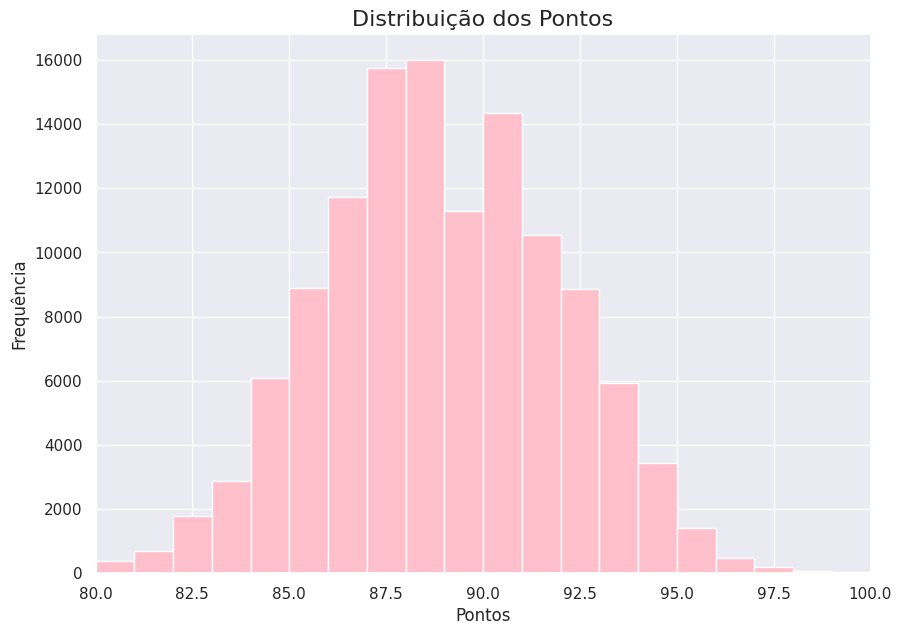

In [14]:
plt.figure(figsize=(10, 7))
plt.hist(data=df1, x='points',
         bins=np.arange (80, df1['points'].max()+1, 1),
         color = 'pink')
plt.xlim(80,100)
plt.title('Distribuição dos Pontos', fontsize=16)
plt.xlabel('Pontos')
plt.ylabel('Frequência')

Observamos que é uma distribuição quase normal entre 80 e 100.

Quais países estão no Top 10 na Produção de Vinhos?

In [15]:
country_top_10 = df1["country"].value_counts()[:10]
country_top_10

,count
country,
US,54265
France,17776
Italy,16914
Spain,6573
Portugal,4875
Chile,4415
Argentina,3756
Austria,2799
Australia,2294


Vamos gerar um gráfico para comparar os países que avaliaram mais vinhos.

Text(0, 0.5, 'Total de Avaliações')

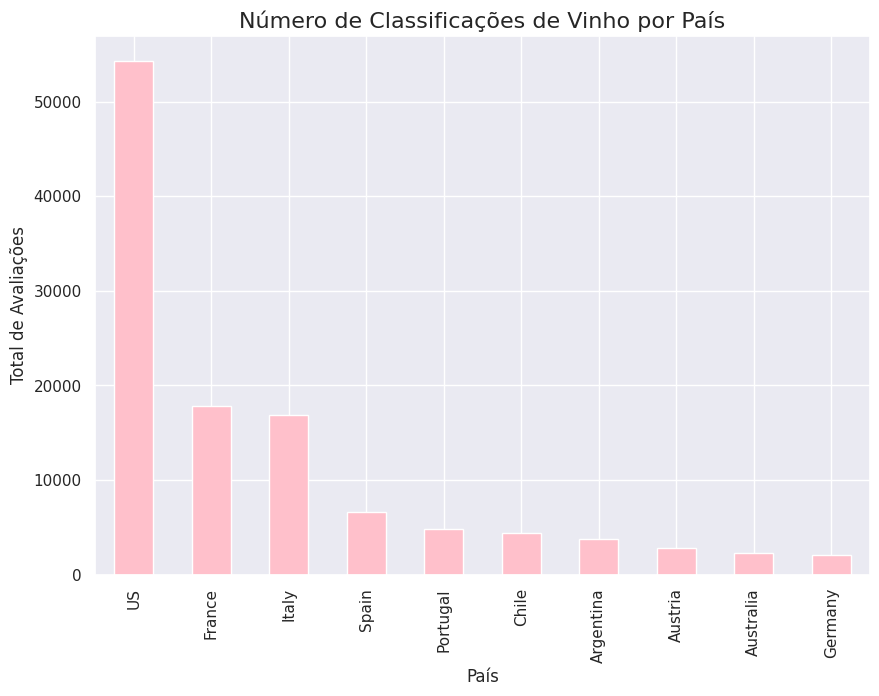

In [16]:
plt.figure(figsize=(10,7))
country_top_10.plot(kind='bar', color = 'pink')
plt.title('Número de Classificações de Vinho por País', fontsize = 16)
plt.xlabel('País')
plt.ylabel('Total de Avaliações')

Tendo em vista a ordenação do gráfico acima, vamos descobrir quantos países criam vinhos de melhor qualidade de acordo com as classificações.

In [17]:
melhor_qualidade = df1.groupby("country")['points'].agg("mean")
melhor_qualidade = melhor_qualidade.sort_values(ascending=False)[:10]
melhor_qualidade.to_frame().style.background_gradient(cmap='Blues',high=0.5)

,points
country,
England,91.550725
India,90.222222
Austria,90.190782
Germany,89.836321
Canada,89.377953
Hungary,89.165517
China,89.000000
France,88.734867
Luxembourg,88.666667


Gráfico dos países que criam vinhos de melhor qualidade de acordo com as classificações:



<ipython-input-18-6ae46dca8ca1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette = 'Purples_r')


Text(0, 0.5, 'País')

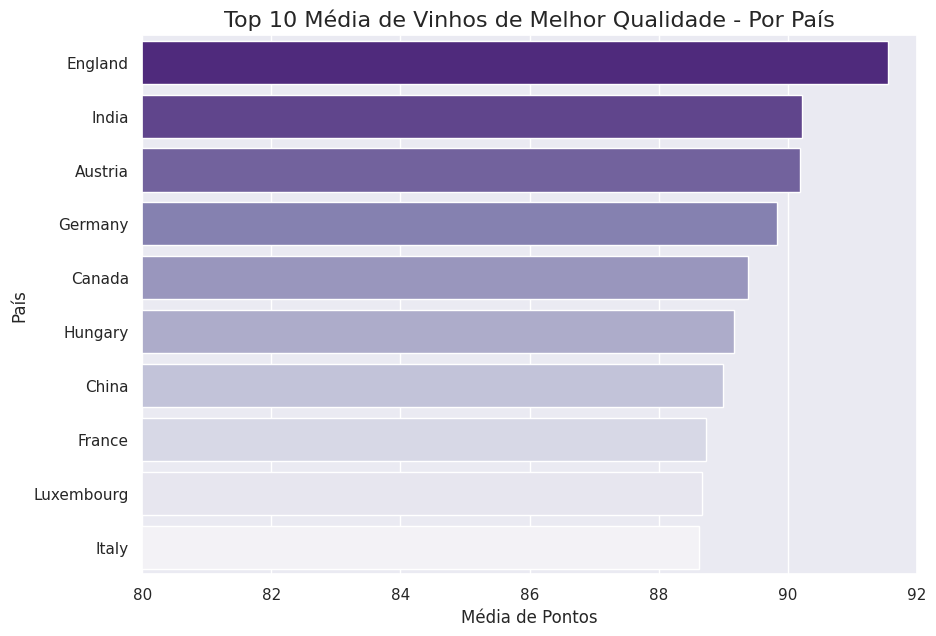

In [18]:
y = melhor_qualidade.index.to_series()
x = melhor_qualidade

plt.figure(figsize=(10,7))
plt.xlim(80,92)
sns.barplot(x=x, y=y, palette = 'Purples_r')
plt.title('Top 10 Média de Vinhos de Melhor Qualidade - Por País', fontsize = 16)
plt.xlabel('Média de Pontos')
plt.ylabel('País')

Percebemos que o país com melhor avaliação/produziu o melhor vinho foi a Inglaterra. Pode ter ocorrido pois talvez haja menos vinhos da Inglaterra no noddo df e tenham uma pontuação alta, vamos investigar?

Países com pontuação máxima acima de 95:

In [19]:
high_scores = df1[df1["points"] >= 95]
high_scores["country"].value_counts()

,count
country,
US,991
France,509
Italy,326
Austria,103
Portugal,96
Germany,62
Spain,51
Australia,47
Argentina,11


Os países com classificação mais alta diferemdo nosso gráfico de pontuações mais altas com base em médias. Vamos criar um boxplot para ver máx, mín e média das pontuações. Como nosso df possui mais vinhos avaliados nos EUA, é possível que tenha uma grande variedade de vinhos lá, enquanto a Inglaterra, com a melhor pontuação média, tem menos vinhos do nosso df, o que é injusto.

Text(0, 0.5, 'País')

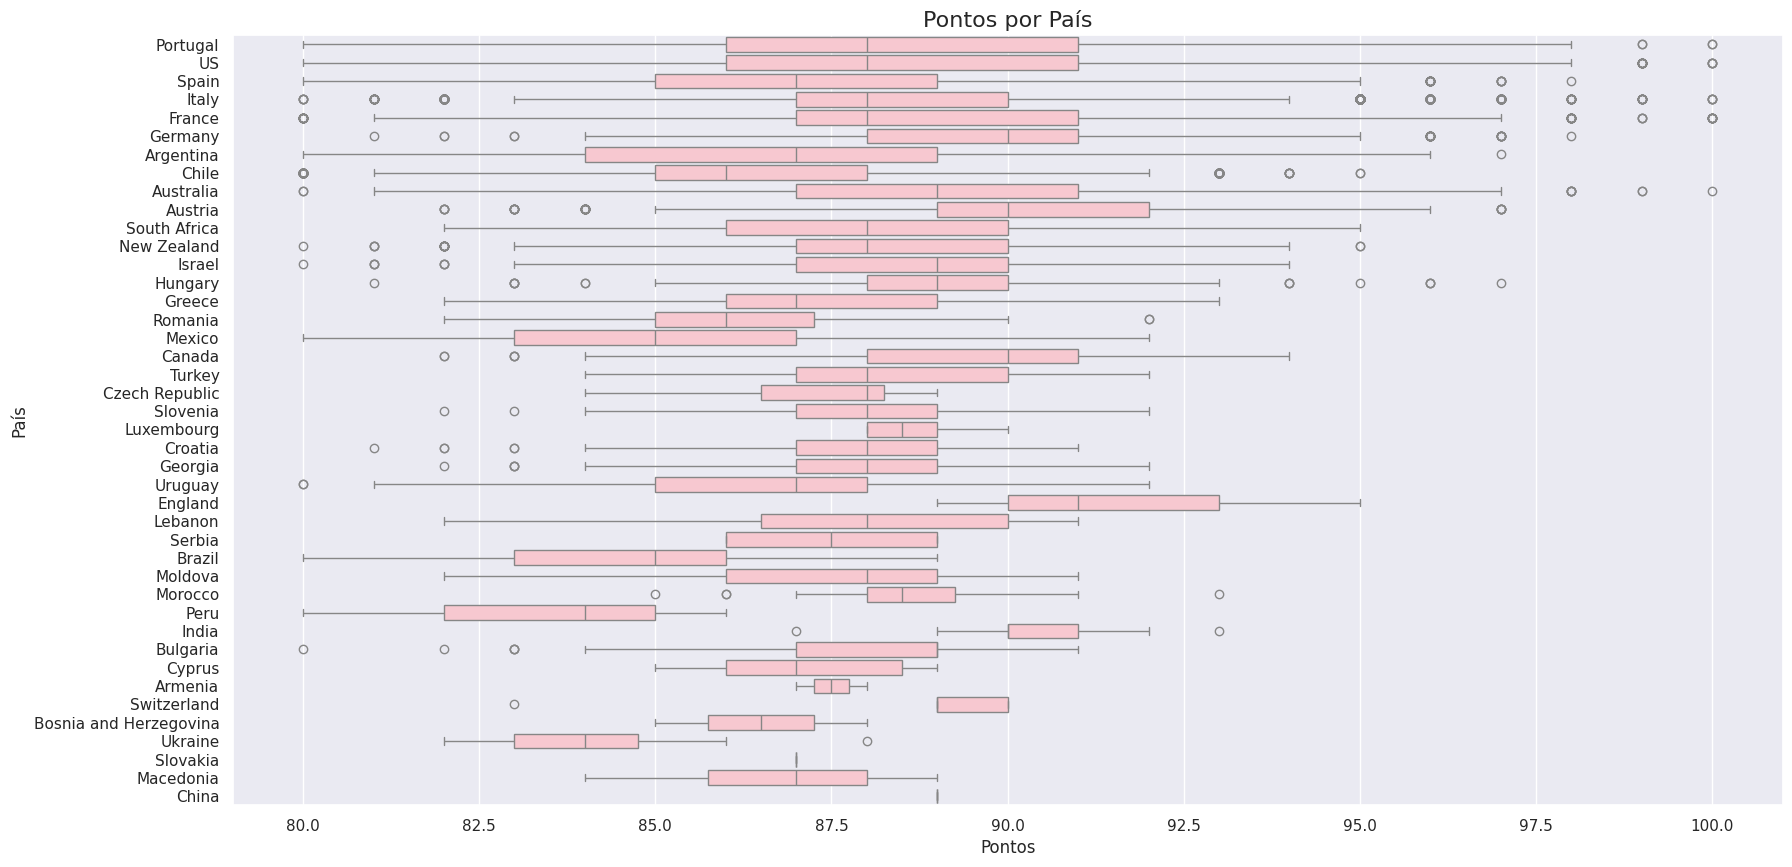

In [20]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df1, x='points', y='country', color = 'Pink')
plt.title('Pontos por País', fontsize = 16)
plt.xlabel('Pontos')
plt.ylabel('País')

Os vinhos da Inglaterra tem pontos mais altos em média, mas os vinhos de Portugal, EUA, Itália, França e Austrália receberam uma pontuação de 100 perfeita. Existem mais vinhos desses países no nosso df, por isso receberam uma gama maior de pontos.

Vamos investigar o preço dos vinho nos países:

<ipython-input-21-ff042439aaac>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='Purples_r')


Text(0, 0.5, 'País')

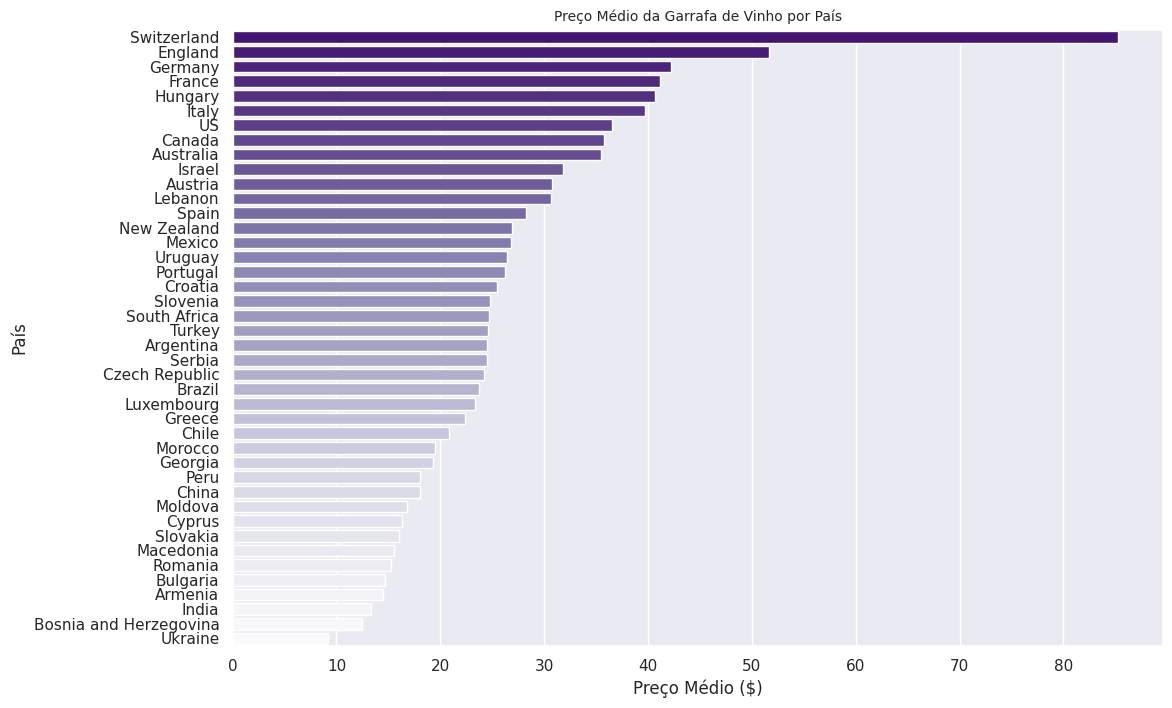

In [21]:
average_price = df1.groupby("country")['price'].mean()
average_price = average_price.sort_values(ascending=False)
y = average_price.index.to_series()
x = average_price.values

plt.figure(figsize=(12,8))
sns.barplot(x=x, y=y, palette='Purples_r')
plt.title('Preço Médio da Garrafa de Vinho por País', fontsize = 10)
plt.xlabel('Preço Médio ($)')
plt.ylabel('País')

Descobrimos que a Suíça produz a garrafa mais cara de vinho, onde o preço da garrafa é mais de `$80`. Em contrapartida, os vinhos da Ucrânia estão no outro extremo, com preço de `$10 ` a garrafa. Vamos ver se o preço se relaciona com a qualidade do vinho com histogramas!

Text(0, 0.5, 'Frequência')

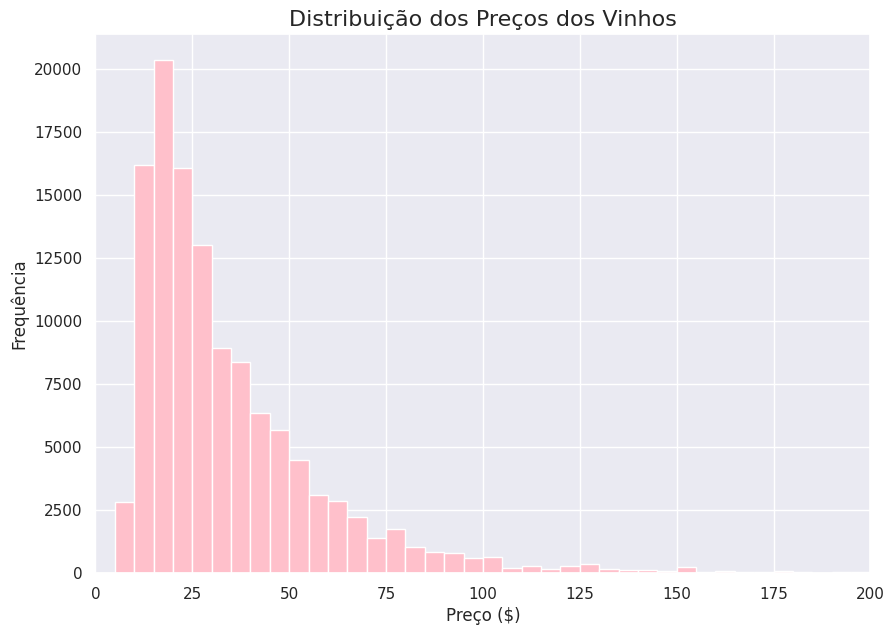

In [22]:
plt.figure(figsize=(10, 7))
bins = np.arange(0, df1["price"].max() + 5, 5)
plt.hist(data=df1, x='price', bins=bins, color = 'Pink')
plt.xlim(0,200)
plt.title('Distribuição dos Preços dos Vinhos', fontsize=16)
plt.xlabel('Preço ($)')
plt.ylabel('Frequência')

Como os dados apesentaram uma distorção grande para a direita, vamos fazer uma transformação logarítmica nos dados.

In [23]:
df1['price'].describe()

,price
count,120915.000000
mean,35.368796
std,41.031188
min,4.000000
25%,17.000000
50%,25.000000
75%,42.000000
max,3300.000000


In [24]:
np.log10(df1["price"].describe())

,price
count,5.082480
mean,1.548620
std,1.613114
min,0.602060
25%,1.230449
50%,1.397940
75%,1.623249
max,3.518514


Vamos utilizar os dados com a transformação para o nosso histograma

Text(0, 0.5, 'Frequência')

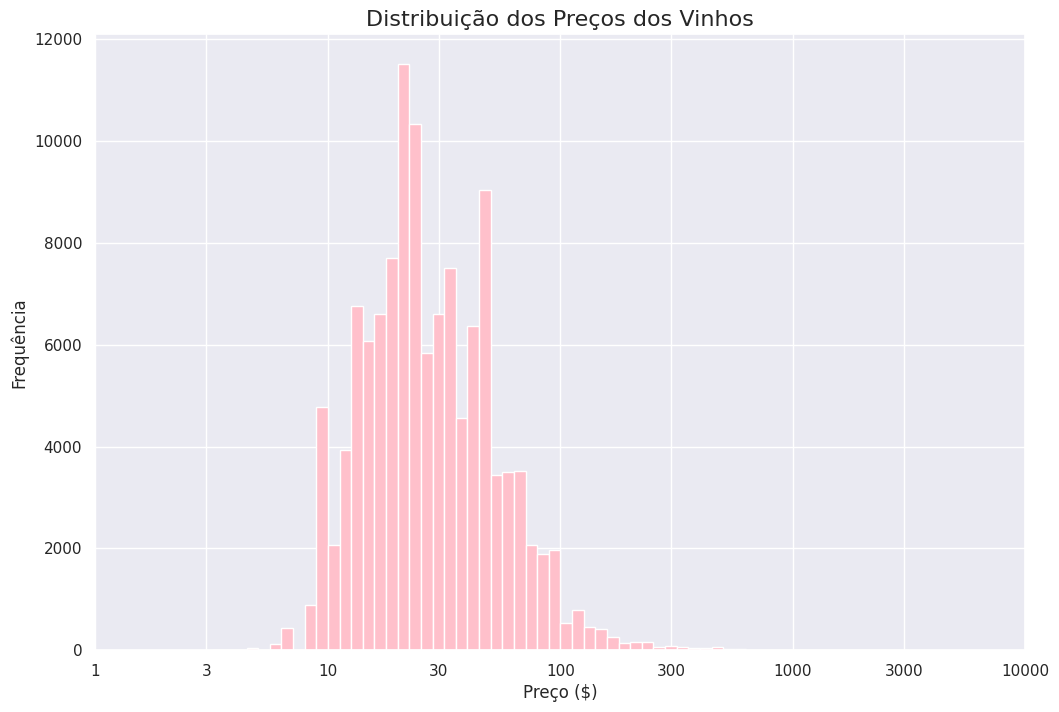

In [25]:
plt.figure(figsize=(12, 8))
bins = 10 ** np.arange(0.5, 3.5 + 0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.hist(data=df1, x='price', bins=bins, color ='Pink')
plt.title('Distribuição dos Preços dos Vinhos', fontsize=16)
plt.xscale('log')
plt.xticks(ticks,ticks)
plt.xlabel('Preço ($)')
plt.ylabel('Frequência')

Temos uma distribuição quase normal agora. Mas existe um salto na região dos `10$` e um pico mais visível em pouco mais de `20$`, depois outro de `50$`. Vamos plotar um gráfico scatter para ver se existe orrelação entre pontuação e valor da garrafa.

In [ ]:
# Heatmap (mapa de calor)

Text(0, 0.5, 'Pontos')

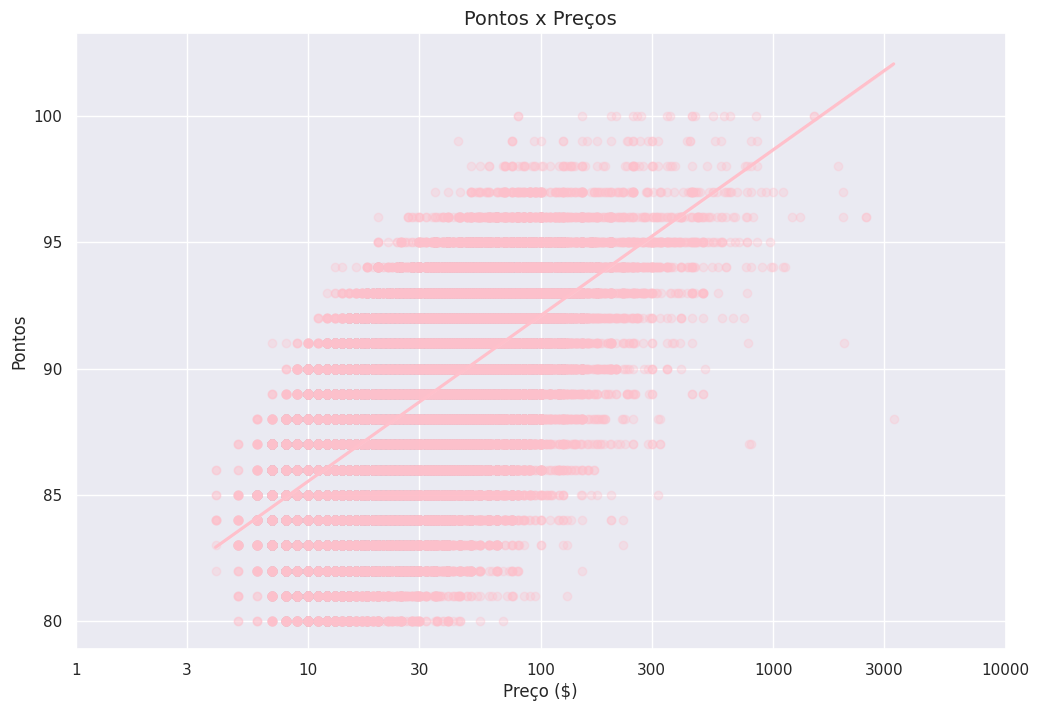

In [26]:
x = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]

plt.figure(figsize=(12,8))
sns.regplot(x='price', y='points', data=df1, color='Pink', logx=True, scatter_kws={'alpha':0.3})
plt.title('Pontos x Preços', fontsize=14)
plt.xscale('log')
plt.xticks(x,x)
plt.xlabel('Preço ($)')
plt.ylabel('Pontos')

O gráfico mostrou uma relação positiva entre as variáveis, ou seja, vinhos mais caros tendem a receber melhores avaliações. Existem pontos mais afastados, vamos listá-los para descobrir quais vinhos são esses, buscanso máximo e mínimo.

In [27]:
df1[df1['price'] == df1['price'].min()][:1]

,country,description,points,price,province,title,variety,winery
1987,Spain,Berry and cherry aromas are surprisingly sturd...,85,4.0,Central Spain,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis


In [28]:
df1[df1['price'] == df1['price'].max()][:1]

,country,description,points,price,province,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,88,3300.0,Bordeaux,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet


Por um lado, um vinho espanhol de 4 dólares e 85 pontos, e um vinho Francês de 88 pontos custando 3.300 dólares.
Vamos investigar se tipos de uva são de melhor qualidade, filtramos uma amostra dos top 20 melhores vinhos e ver como pontuam.

In [29]:
df1['variety'].value_counts()[:20]

,count
variety,
Pinot Noir,12785
Chardonnay,11077
Cabernet Sauvignon,9384
Red Blend,8466
Bordeaux-style Red Blend,5340
Riesling,4971
Sauvignon Blanc,4780
Syrah,4086
Rosé,3261


Gráfico Boxplot

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Pinot Noir'),
  Text(1, 0, 'Chardonnay'),
  Text(2, 0, 'Cabernet Sauvignon'),
  Text(3, 0, 'Red Blend'),
  Text(4, 0, 'Bordeaux-style Red Blend'),
  Text(5, 0, 'Riesling'),
  Text(6, 0, 'Sauvignon Blanc'),
  Text(7, 0, 'Syrah'),
  Text(8, 0, 'Rosé'),
  Text(9, 0, 'Merlot'),
  Text(10, 0, 'Zinfandel'),
  Text(11, 0, 'Malbec'),
  Text(12, 0, 'Sangiovese'),
  Text(13, 0, 'Nebbiolo'),
  Text(14, 0, 'Portuguese Red'),
  Text(15, 0, 'White Blend'),
  Text(16, 0, 'Sparkling Blend'),
  Text(17, 0, 'Tempranillo'),
  Text(18, 0, 'Rhône-style Red Blend'),
  Text(19, 0, 'Pinot Gris')])

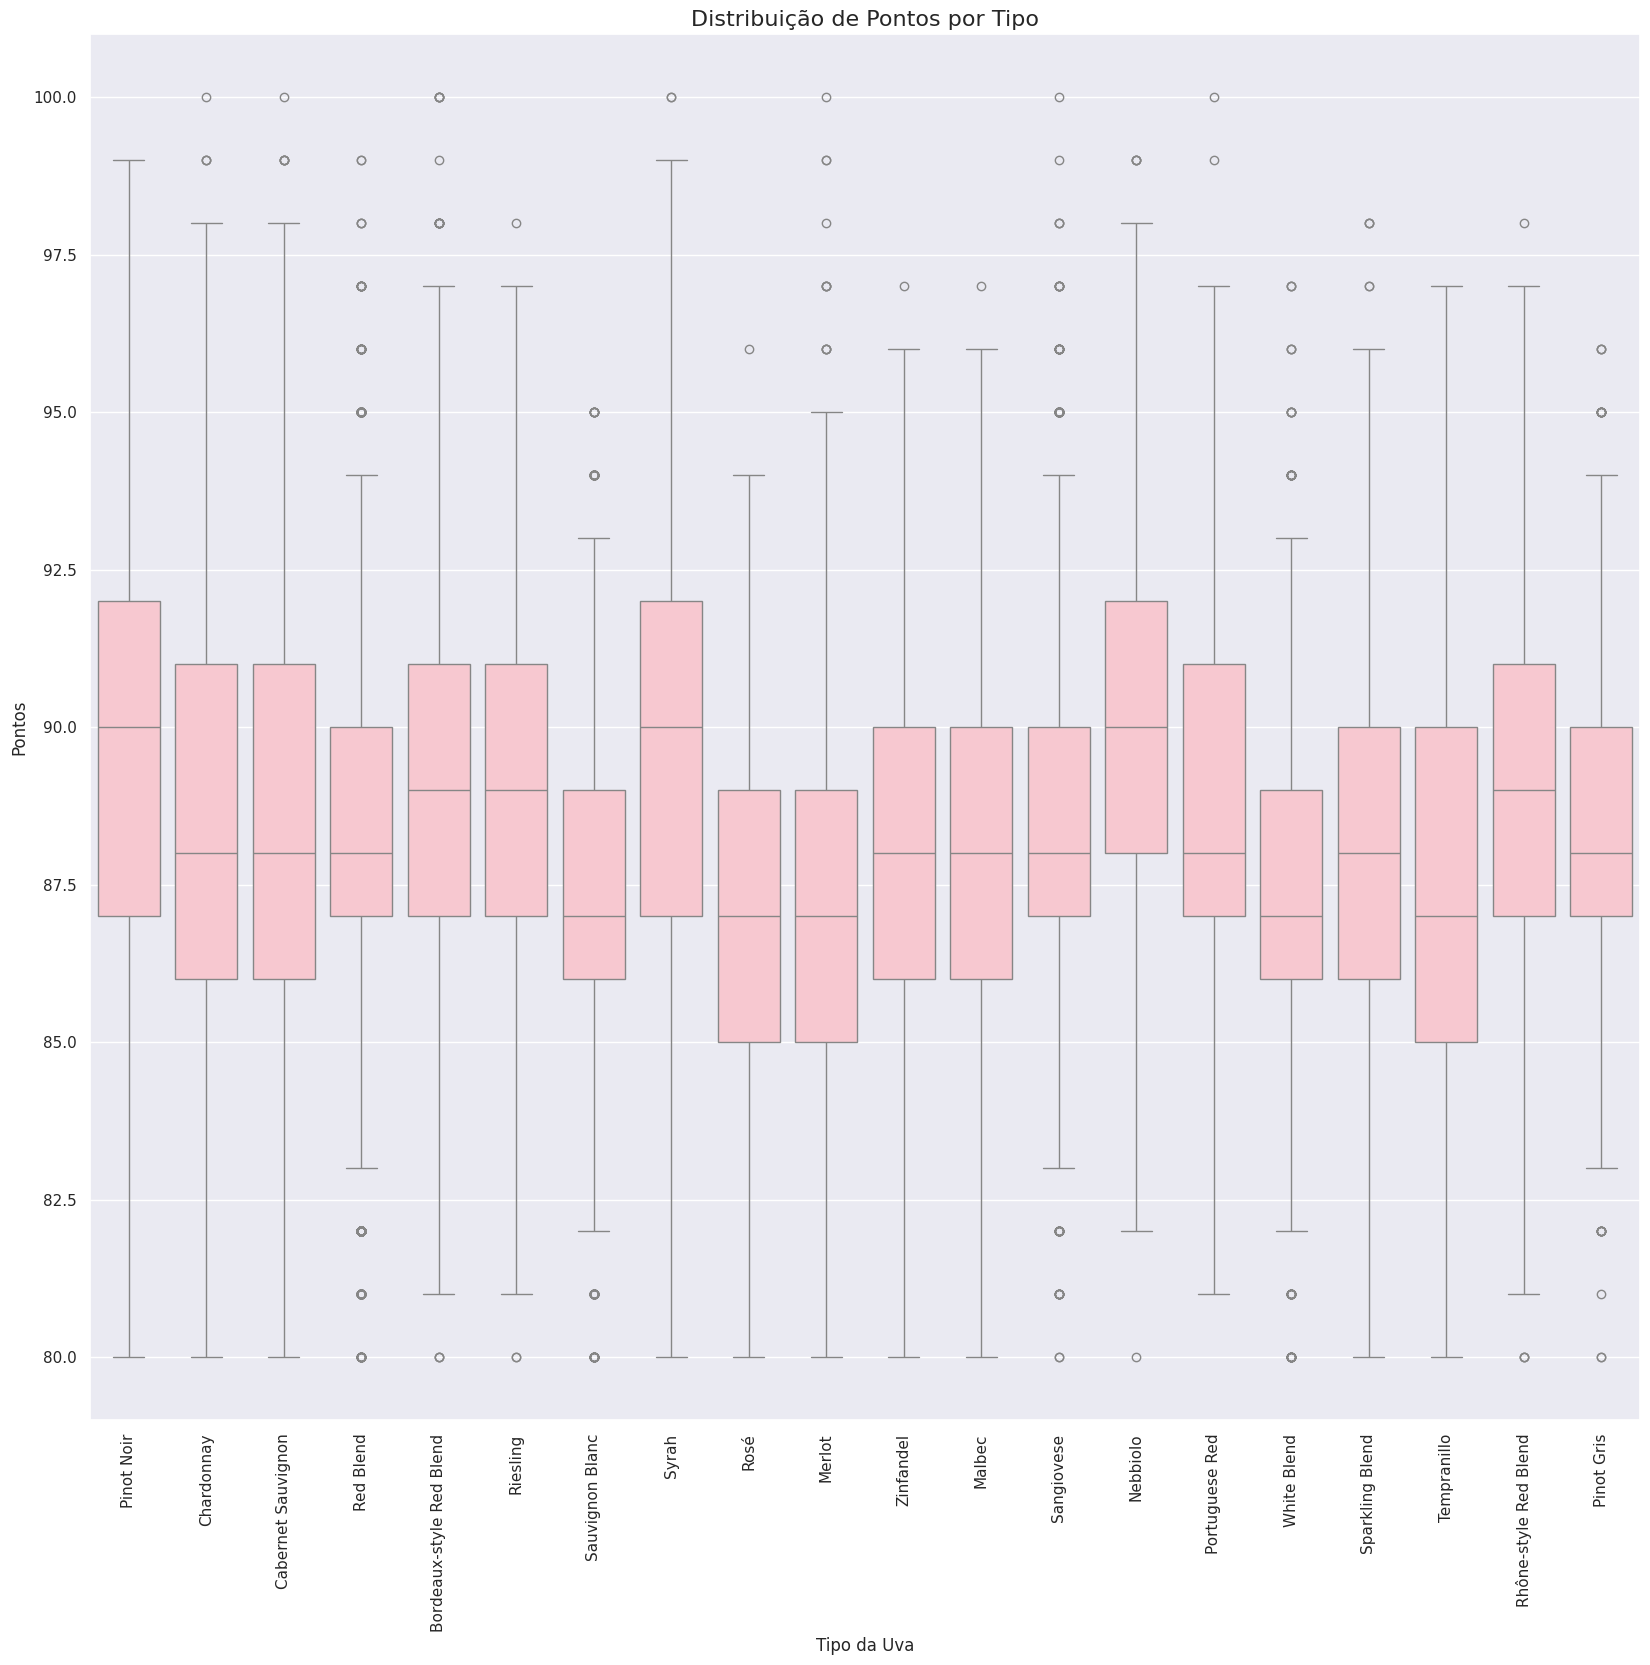

In [30]:
plt.figure(figsize=(20,18))
sns.boxplot(data=df1,
            x='variety',
            y='points',
            color='Pink',
            order=df1["variety"].value_counts().iloc[:20].index)

plt.title('Distribuição de Pontos por Tipo', fontsize=16)
plt.xlabel('Tipo da Uva')
plt.ylabel('Pontos')
plt.xticks(rotation = 90)

Ok, listamos os top 20, e conseguimos ver que o tipo Pinot Noirt tende a ser melhor pois tem a pontuação média mais alta.

Vamos descobrir o melhor vinho custo-benefício em faixas de preço.

```
Até $15

Entre $15 e $30

Entre $30 e $50

Acima de $50
```

In [31]:
# Até 15

under_15 = df1.drop(["description","province","winery"], axis=1)
under_15 = under_15[under_15["price"] <= 15]
under_15 = under_15.sort_values(by="points", ascending=False)[:10]
under_15.style.background_gradient(cmap='YlOrRd', high= 0.5, subset=['price'])

,country,points,price,title,variety
19136,Spain,94,14.000000,Osborne NV Pedro Ximenez 1827 Sweet Sherry Sherry (Jerez),Sherry
23974,Portugal,94,13.000000,Quinta dos Murças 2011 Assobio Red (Douro),Portuguese Red
12255,South Africa,93,15.000000,Simonsig 1998 Cabernet Sauvignon (Stellenbosch),Cabernet Sauvignon
129572,France,93,15.000000,Domaine des Carteresses 2016 Tavel,Rosé
37882,Australia,93,15.000000,Marquis Philips 2000 Sarah's Blend Red (South Eastern Australia),Red Blend
74042,France,93,15.000000,Domaine des Carteresses 2016 Tavel,Rosé
52776,US,93,14.000000,Uvaggio 2009 Vermentino (Lodi),Vermentino
43193,US,93,14.000000,Novy 2006 Oley Dessert Wine Viognier (Russian River Valley),Viognier
9609,France,93,13.000000,Château Vincens 2011 Prestige Malbec-Merlot (Cahors),Malbec-Merlot
59823,US,93,14.000000,Novy 2006 Oley Dessert Wine Viognier (Russian River Valley),Viognier


`Até $15:` vinho Português de 94 pontos por $13, Quinta dos Murças 2011 Assobio Red(Douro)

In [32]:
# Entre $15 e $30
between_15_and_30 = df1.drop(["description", "province", "winery"], axis=1)
between_15_and_30 = between_15_and_30.query("price > 15 and price <= 30")
between_15_and_30 = between_15_and_30.sort_values(by="points", ascending=False)[:10]
between_15_and_30.style.background_gradient(cmap='YlOrRd', high= 0.5, subset=['price'])

,country,points,price,title,variety
54311,Austria,96,28.000000,Eichinger 2014 Gaisberg Reserve Riesling (Kamptal),Riesling
81902,US,96,30.000000,Efeste 2009 Lola Chardonnay (Columbia Valley (WA)),Chardonnay
45992,France,96,28.000000,Château Filhot 2014 Sauternes,Bordeaux-style White Blend
102489,US,96,27.000000,The Eyrie Vineyards 2014 Estate Chardonnay (Dundee Hills),Chardonnay
119658,Spain,96,30.000000,Alvear NV Solera 1927 Pedro Ximénez (Montilla-Moriles),Pedro Ximénez
101580,US,96,20.000000,Rulo 2007 Syrah (Columbia Valley (WA)),Syrah
9901,France,96,29.000000,Domaines Schlumberger 2014 Saering Grand Cru Riesling (Alsace),Riesling
40309,Italy,96,27.000000,Isole e Olena 2010 Chianti Classico,Red Blend
109845,US,96,30.000000,Sineann 2015 TFL Pinot Noir (Willamette Valley),Pinot Noir
54253,US,96,27.000000,Donkey & Goat 2012 Grenache Noir Grenache (El Dorado),Grenache


`Entre $15 e $30:` vinho dos EUA de 96 pontos por $20.

In [33]:
# Entre $30 e $50
between_30_and_50 = df1.drop(["description", "province", "winery"], axis=1)
between_30_and_50 = between_30_and_50.query("price > 30 and price <= 50")
between_30_and_50 = between_30_and_50.sort_values(by="points", ascending=False)[:10]
between_30_and_50.style.background_gradient(cmap='YlOrRd', high= 0.5, subset=['price'])

,country,points,price,title,variety
118059,US,99,44.000000,Failla 2010 Estate Vineyard Chardonnay (Sonoma Coast),Chardonnay
1560,US,98,50.000000,Pirouette 2008 Red Wine Red (Columbia Valley (WA)),Bordeaux-style Red Blend
47432,US,97,50.000000,Williams Selyem 2010 Allen Vineyard Chardonnay (Russian River Valley),Chardonnay
4504,US,97,50.000000,Limerick Lane 2013 Rocky Knoll Zinfandel (Russian River Valley),Zinfandel
114981,US,97,35.000000,Donkey & Goat 2010 Fenaughty Vineyard Syrah (El Dorado),Syrah
45986,France,97,45.000000,Château Coutet 2014 Barsac,Bordeaux-style White Blend
125831,US,97,50.000000,Dutton-Goldfield 2010 Dutton Ranch Rued Vineyard Chardonnay (Green Valley),Chardonnay
16524,Portugal,97,40.000000,Taylor Fladgate NV 325 Anniversary (Port),Port
128268,US,97,50.000000,Trefethen 2005 Estate Cabernet Sauvignon (Oak Knoll District),Cabernet Sauvignon
89730,France,97,50.000000,René Muré 2015 Clos Saint Landelin Vorbourg Grand Cru Riesling (Alsace),Riesling


`Entre $30 e $50:` vinho dos EUA de 99 pontos por $44.

In [34]:
# Acima de $50
above_50 = df1.drop(["description", "province", "winery"], axis=1)
above_50 = above_50.query("price > 50")
above_50 = above_50.sort_values(by="points", ascending=False)[:10]
above_50.style.background_gradient(cmap='YlOrRd', high= 0.5, subset=['price'])

,country,points,price,title,variety
113929,US,100,80.000000,Charles Smith 2006 Royal City Syrah (Columbia Valley (WA)),Syrah
111755,France,100,1500.000000,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend
89728,France,100,250.000000,Louis Roederer 2008 Cristal Vintage Brut (Champagne),Champagne Blend
123545,US,100,80.000000,Cayuse 2008 Bionic Frog Syrah (Walla Walla Valley (WA)),Syrah
118058,US,100,450.000000,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend
89729,France,100,617.000000,Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonnay (Champagne),Chardonnay
45781,Italy,100,550.000000,Biondi Santi 2010 Riserva (Brunello di Montalcino),Sangiovese
111753,France,100,1500.000000,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend
111754,Italy,100,270.000000,Casanova di Neri 2007 Cerretalto (Brunello di Montalcino),Sangiovese Grosso
42197,Portugal,100,450.000000,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red


`Acima de $50:` Dois vinhos dos EUA de 100 pontos por $80 (Charles Smith 2006 Royal City Syrah e Cayuse 2008 Bionic Frog Syrah).

Vamos descobrir quais palavras são mais utilizadas pra descrever um vinho. A lib `wordcloud` separa cada palavra em texto e permite filtrar as que aparecem mais, gerando uma nuvem de palavras.

In [35]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = df1["description"][1]
text = " ".join(i for i in df1["description"])
len(text)

29653210

Ok, temos o texto agrupado. Agora a lib disponibiliza uma ferramenta importada stopwords, que é lista de palavras que serão eliminadas no processo de criação da nuvem de palavras.

In [36]:
from logging.config import stopListening
stopwords = set(STOPWORDS)
stopwords.update(["drink","now","wine","flavor","flavors"])
wordcloud = WordCloud(stopwords=stopwords,
                     background_color="white",
                     width=2048,
                     height=1024,
                     max_words=1000).generate(text)

Com a nuvem pronta, precisamos exibir a imagem com as palavras:

(-0.5, 2047.5, 1023.5, -0.5)

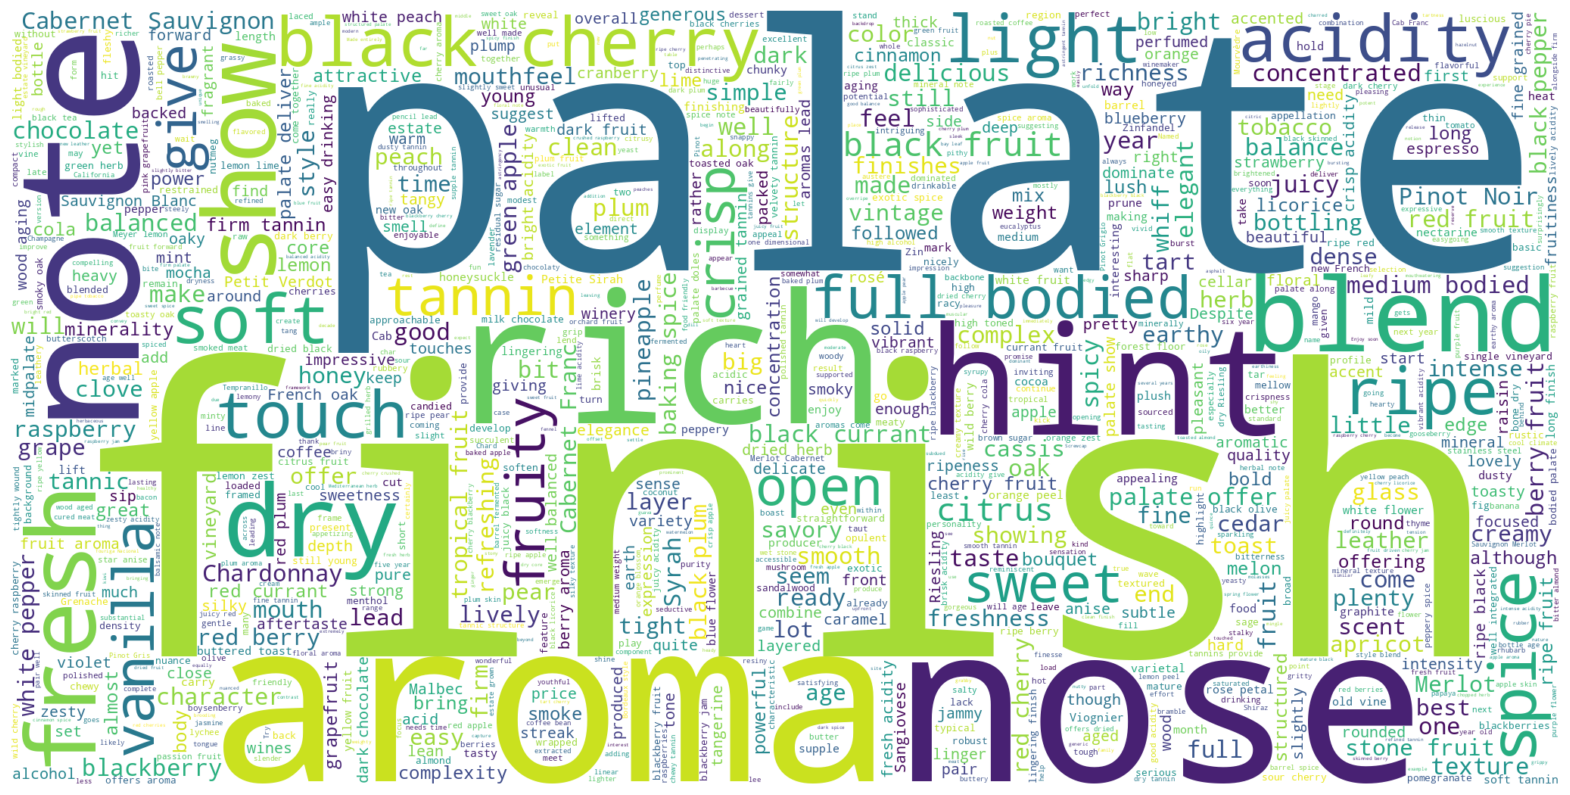

In [37]:
plt.figure(figsize=(20,18))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

Vamos identificar as combinações de país e variedade com notas altas:

In [38]:
combination_quality = df1.groupby(['country', 'variety']).agg({'points': 'mean', 'price': 'mean'}).reset_index()

high_quality_combinations = combination_quality[combination_quality['points'] > 90]
high_quality_combinations.sort_values(by='points', ascending=False).head(10)

,country,variety,points,price
76,Australia,Cabernet-Shiraz,96.000000,150.000000
1030,Portugal,Terrantez,95.000000,236.000000
1258,Spain,Tinta del Pais,95.000000,47.500000
149,Austria,Gelber Traminer,95.000000,35.000000
1126,South Africa,Muscat,94.500000,70.000000
976,Portugal,Bual,94.333333,100.000000
145,Austria,Chardonnay Weissburgunder,94.000000,58.000000
1519,US,Syrah-Petit Verdot,94.000000,49.000000
94,Australia,Muscadelle,94.000000,160.333333
1023,Portugal,Sercial,94.000000,50.000000


Interessante.

Podemos investigar a influência da descrição nas avaliações também, será que as palavras mexem com o sentimento dos avaliadores?
Vamos calcular a média dos pontos de acordo com algumas palavras-chave comuns na descrição:

<ipython-input-39-e361921bf308>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_df, x='Keyword', y='Average Points', palette='Blues')


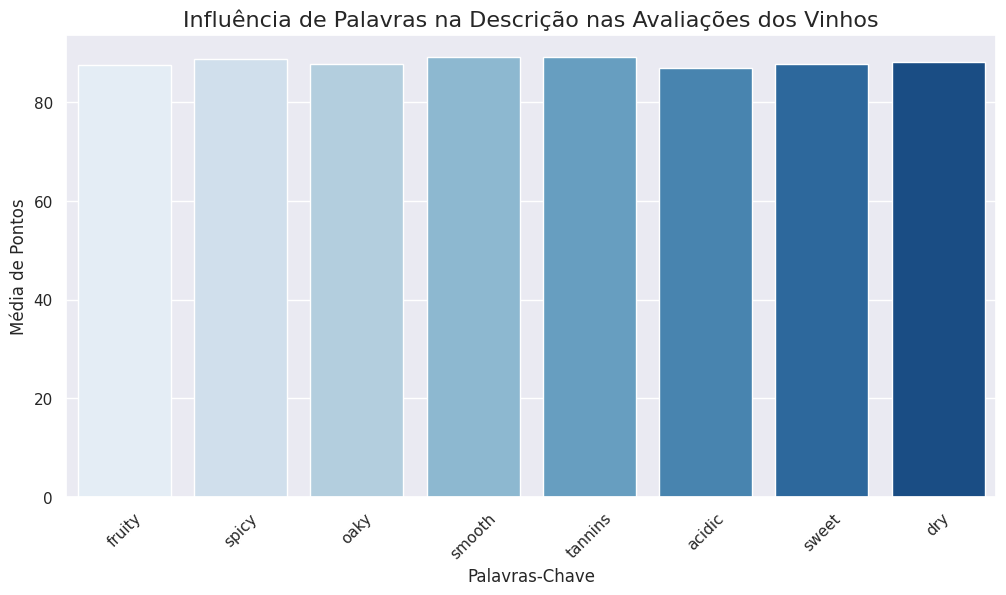

In [39]:
keywords = ['fruity', 'spicy', 'oaky', 'smooth', 'tannins', 'acidic', 'sweet', 'dry']

# Dicionário para armazenar as médias
sentiment_analysis = {}

for keyword in keywords:
    avg_points = df1[df1['description'].str.contains(keyword, case=False, na=False)]['points'].mean()
    sentiment_analysis[keyword] = avg_points

sentiment_df = pd.DataFrame(list(sentiment_analysis.items()), columns=['Keyword', 'Average Points'])
plt.figure(figsize=(12, 6))
sns.barplot(data=sentiment_df, x='Keyword', y='Average Points', palette='Blues')
plt.title('Influência de Palavras na Descrição nas Avaliações dos Vinhos', fontsize=16)
plt.xlabel('Palavras-Chave')
plt.ylabel('Média de Pontos')
plt.xticks(rotation=45)
plt.show()

Podemos analisar explorar a consistência das pontuações em diferentes variedades e estilos de vinho, descobrindo os estilos de vinho que apresentam a maior variação nas avaliações dos especialistas.

<ipython-input-40-7a12b8d1d219>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_variations, x='std', y='variety', palette='Blues')


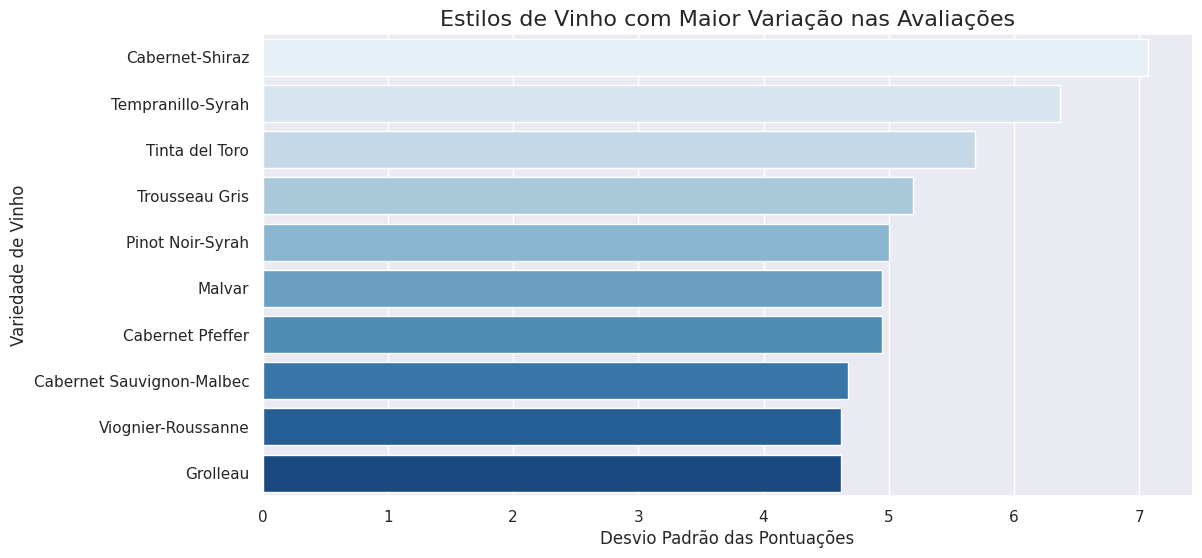

In [40]:
variety_variation = df1.groupby('variety')['points'].agg(['mean', 'std']).reset_index()
variety_variation = variety_variation.sort_values(by='std', ascending=False)
top_variations = variety_variation.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_variations, x='std', y='variety', palette='Blues')
plt.title('Estilos de Vinho com Maior Variação nas Avaliações', fontsize=16)
plt.xlabel('Desvio Padrão das Pontuações')
plt.ylabel('Variedade de Vinho')
plt.show()


# **Conclusão**

- **De onde vem o melhor vinho ?**

  R.: Inglaterra é quem produz vinhos mais soberbos, mas olhar para França, Itália, EUA, Porugal ou Austrália também é interessante com pontuação 100.

- **O preço do vinho está relacionado com a qualidade ?**

  R.: Sim, mas se você souber onde procurar, pode encontrar até um de `$4 `que se iguala à um de `$3.300`.

- **Certas variedades de uvas são de maior qualidade ?**

  R.: Todas estão na mesma situação, a maior aposta é Pinor Noir.

- **Qual é o melhor vinho em cada faixa de preço ?**

  R.: Encontramos um vinho para cada orçamento, com destaques.

- **Que palavras são mais utilizadas para descrever um vinho ?**

  R.: Termos como 'finish' e 'polate'.

- **A descrição do vinho influencia a avaliação dos especialistas?**

  R.: A análise mostrou termos não influemciam em diferenças significativas nas médias de pontos.

- **Quais são os estilos de vinho que apresentam a maior variação nas avaliações dos especialistas?**

  R.: Cabernet-Shiraz tem maior variação, mas Tempranillo-Syrah e Tinta del Toro também mostram uma variação significativa.

- **Quais são as combinações mais comuns de país, variedade e preço que resultam em alta qualidade?**

  R.:

  Austrália - Cabernet-Shiraz: Média 96 pontos, preço `$150`.

  Portugal - Terrantez: Média 95 pontos, preço `$236`.

  Espanha - Tinta del Pais: Média 95 pontos, preço `$47`

  Áustria - Gelber Traminer: Média 95 pontos, preço  `$35`.
